In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
pd.set_option('display.float_format',lambda x: '%.2f' % x)

flight_data_path = "./data/Flights.csv"
tickets_data_path = "./data/Tickets.csv"
airport_codes_path = "./data/Airport_Codes.csv"

In [204]:
flight_df = pd.read_csv(flight_data_path)
tickets_df = pd.read_csv(tickets_data_path)
airport_df = pd.read_csv(airport_codes_path)
print("flight_df")
print(flight_df.head(1).to_string(index=False))
print("ticket_df")
print(tickets_df.head(1).to_string(index=False))
print("airport_df")
print(airport_df.head(1).to_string(index=False))

# flight_nulls = flight_df.isnull().sum()
# print(flight_nulls)

C:\Users\saika\AppData\Local\Temp\ipykernel_19948\3880314688.py:1: DtypeWarning: Columns (3,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_df = pd.read_csv(flight_data_path)


flight_df
   FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN ORIGIN_CITY_NAME  DEST_AIRPORT_ID DESTINATION DEST_CITY_NAME  DEP_DELAY  ARR_DELAY  CANCELLED AIR_TIME DISTANCE  OCCUPANCY_RATE
2019-03-02         WN   N955WN              4591              14635    RSW   Fort Myers, FL            11042         CLE  Cleveland, OH      -8.00      -6.00       0.00   143.00  1025.00            0.97
ticket_df
     ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS ITIN_FARE DESTINATION
201912723049  2019        1    ABI             US               TX           Texas       1.00                MQ        1.00     736.0         DAB
airport_df
    TYPE              NAME  ELEVATION_FT CONTINENT ISO_COUNTRY MUNICIPALITY IATA_CODE                        COORDINATES
heliport Total Rf Heliport         11.00       NaN          US     Bensalem       NaN -74.93360137939453, 40.07080078125


<h4>Data Analysis -- Cleaning and pre processing </h4>

<h3>Flights</h3>

In [205]:
flight_nulls = flight_df.isnull().sum()
print(flight_nulls)


FL_DATE                  0
OP_CARRIER               0
TAIL_NUM             12156
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
ORIGIN_CITY_NAME         0
DEST_AIRPORT_ID          0
DESTINATION              0
DEST_CITY_NAME           0
DEP_DELAY            50351
ARR_DELAY            55991
CANCELLED                0
AIR_TIME             56551
DISTANCE               630
OCCUPANCY_RATE         310
dtype: int64


<h3>Tickets</h3>

In [206]:
print(tickets_df.isnull().sum())

ITIN_ID                 0
YEAR                    0
QUARTER                 0
ORIGIN                  0
ORIGIN_COUNTRY          0
ORIGIN_STATE_ABR        0
ORIGIN_STATE_NM         0
ROUNDTRIP               0
REPORTING_CARRIER       0
PASSENGERS           1977
ITIN_FARE             960
DESTINATION             0
dtype: int64


<h3>Airports</h3>

In [207]:
print(airport_df.isnull().sum())

TYPE                0
NAME                0
ELEVATION_FT     7015
CONTINENT       27843
ISO_COUNTRY       247
MUNICIPALITY     5706
IATA_CODE       46187
COORDINATES         0
dtype: int64


<h4>Data handling</h4>

In [208]:
flight_df.dropna(subset=['TAIL_NUM'], inplace=True)

flight_df['DEP_DELAY'] = pd.to_numeric(flight_df['DEP_DELAY'], errors='coerce')
flight_df['ARR_DELAY'] = pd.to_numeric(flight_df['ARR_DELAY'], errors='coerce')
flight_df['AIR_TIME'] = pd.to_numeric(flight_df['AIR_TIME'], errors='coerce')

flight_df.fillna({'DEP_DELAY' : flight_df['DEP_DELAY'].mean()}, inplace=True)
flight_df.fillna({'ARR_DELAY' : flight_df['ARR_DELAY'].mean()}, inplace=True)
flight_df.fillna({'AIR_TIME' : flight_df['AIR_TIME'].mean()}, inplace=True)


In [209]:
print(flight_df.isnull().sum())

FL_DATE                0
OP_CARRIER             0
TAIL_NUM               0
OP_CARRIER_FL_NUM      0
ORIGIN_AIRPORT_ID      0
ORIGIN                 0
ORIGIN_CITY_NAME       0
DEST_AIRPORT_ID        0
DESTINATION            0
DEST_CITY_NAME         0
DEP_DELAY              0
ARR_DELAY              0
CANCELLED              0
AIR_TIME               0
DISTANCE             620
OCCUPANCY_RATE       310
dtype: int64


In [210]:
tickets_df['ITIN_FARE'] = pd.to_numeric(tickets_df['ITIN_FARE'], errors='coerce')
tickets_df['PASSENGERS'] = pd.to_numeric(tickets_df['PASSENGERS'], errors='coerce')

tickets_df.fillna({'ITIN_FARE' : tickets_df['ITIN_FARE'].mean()}, inplace=True)
tickets_df.fillna({'PASSENGERS' : tickets_df['PASSENGERS'].mean()}, inplace=True)
tickets_df.dropna(subset=['PASSENGERS'], inplace=True)
print(tickets_df.isnull().sum())

ITIN_ID              0
YEAR                 0
QUARTER              0
ORIGIN               0
ORIGIN_COUNTRY       0
ORIGIN_STATE_ABR     0
ORIGIN_STATE_NM      0
ROUNDTRIP            0
REPORTING_CARRIER    0
PASSENGERS           0
ITIN_FARE            0
DESTINATION          0
dtype: int64


In [211]:
# drop continent , IATA CODE, municipality, 

# Drop columns with a significant number of null values
# airport_df.drop(columns=['ELEVATION_FT', 'CONTINENT', 'ISO_COUNTRY', 'MUNICIPALITY', 'IATA_CODE'], inplace=True)
# print(airport_df.isnull().sum())
# Drop rows with NaN values in 'IATA_CODE' column
airport_df.dropna(subset=['IATA_CODE'], inplace=True)
print(airport_df.isnull().sum())
print(airport_df.head(1))

TYPE               0
NAME               0
ELEVATION_FT     352
CONTINENT       2978
ISO_COUNTRY       31
MUNICIPALITY     761
IATA_CODE          0
COORDINATES        0
dtype: int64
              TYPE            NAME  ELEVATION_FT CONTINENT ISO_COUNTRY  \
223  small_airport  Utirik Airport          4.00        OC          MH   

      MUNICIPALITY IATA_CODE         COORDINATES  
223  Utirik Island       UTK  169.852005, 11.222  


In [212]:
print("flight_df")
print(flight_df.head(1).to_string(index=False))
print()
print("ticket_df")
print(tickets_df.head(1).to_string(index=False))
print()
print("airport_df")
print(airport_df.head(1).to_string(index=False))

flight_df
   FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN ORIGIN_CITY_NAME  DEST_AIRPORT_ID DESTINATION DEST_CITY_NAME  DEP_DELAY  ARR_DELAY  CANCELLED  AIR_TIME DISTANCE  OCCUPANCY_RATE
2019-03-02         WN   N955WN              4591              14635    RSW   Fort Myers, FL            11042         CLE  Cleveland, OH      -8.00      -6.00       0.00    143.00  1025.00            0.97

ticket_df
     ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS  ITIN_FARE DESTINATION
201912723049  2019        1    ABI             US               TX           Texas       1.00                MQ        1.00     736.00         DAB

airport_df
         TYPE           NAME  ELEVATION_FT CONTINENT ISO_COUNTRY  MUNICIPALITY IATA_CODE        COORDINATES
small_airport Utirik Airport          4.00        OC          MH Utirik Island       UTK 169.852005, 11.222


Visualization


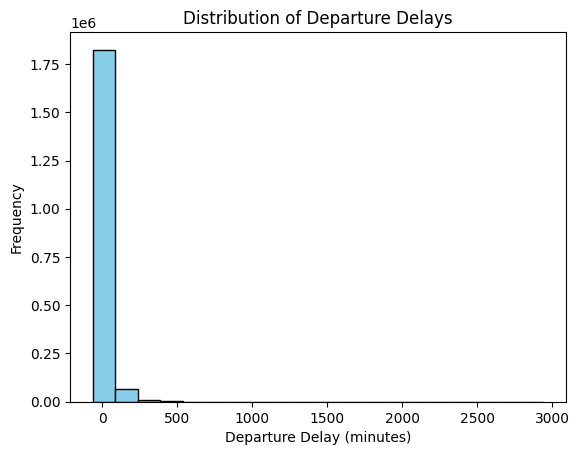

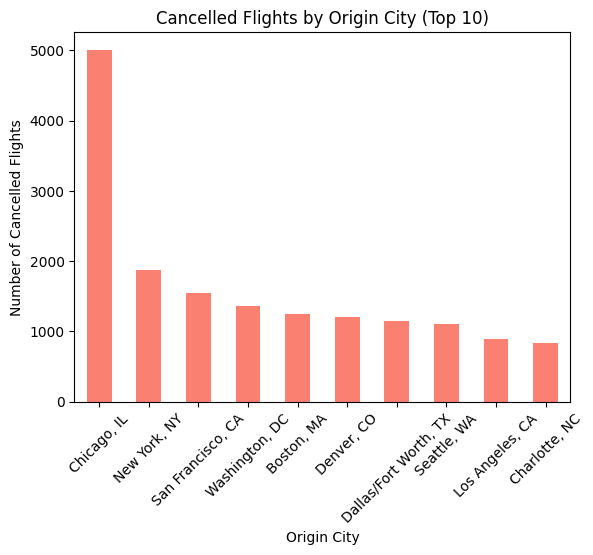

C:\Users\saika\AppData\Local\Temp\ipykernel_19948\2303145661.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OP_CARRIER', y='AIR_TIME', data=flight_df, palette='pastel')


In [213]:
plt.hist(flight_df['DEP_DELAY'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

cancelled_flights_by_city = flight_df[flight_df['CANCELLED'] == 1]['ORIGIN_CITY_NAME'].value_counts()
cancelled_flights_by_city[:10].plot(kind='bar', color='salmon')
plt.title('Cancelled Flights by Origin City (Top 10)')
plt.xlabel('Origin City')
plt.ylabel('Number of Cancelled Flights')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x='OP_CARRIER', y='AIR_TIME', data=flight_df, palette='pastel')
plt.title('Air Time by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Air Time (minutes)')
plt.xticks(rotation=45)
plt.show()





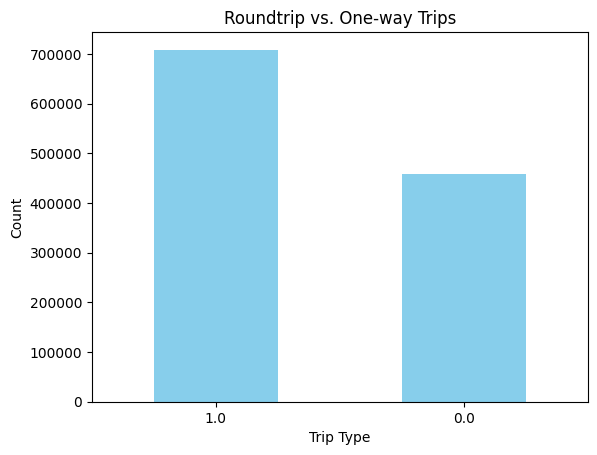

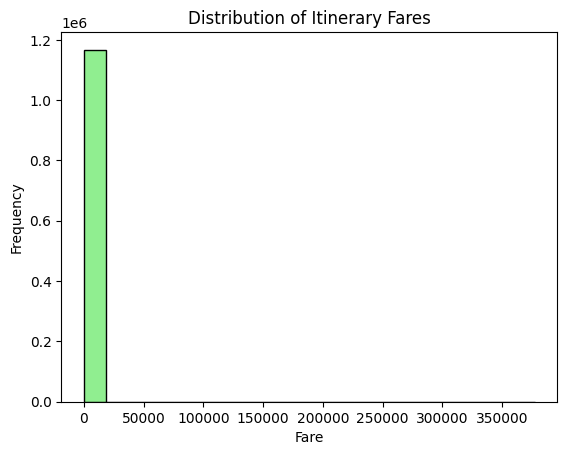

C:\Users\saika\AppData\Local\Temp\ipykernel_19948\22493354.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='QUARTER', y='ITIN_FARE', data=tickets_df, palette='pastel')


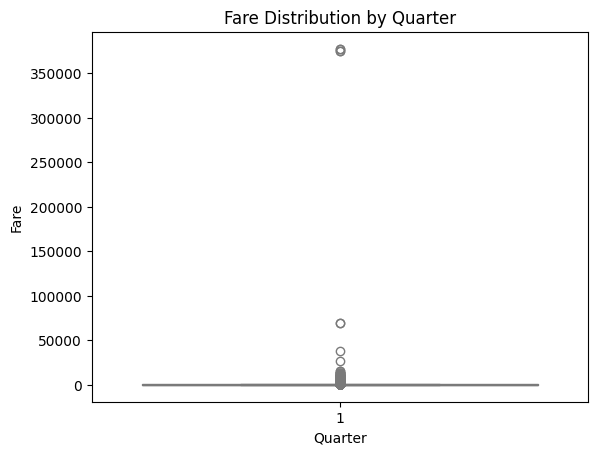

In [214]:
tickets_df['ROUNDTRIP'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Roundtrip vs. One-way Trips')
plt.xlabel('Trip Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

origin_country_counts = tickets_df['ORIGIN_COUNTRY'].value_counts()
plt.pie(origin_country_counts, labels=origin_country_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Itineraries by Origin Country')
plt.show()

plt.hist(tickets_df['ITIN_FARE'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Itinerary Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

passengers_by_carrier = tickets_df.groupby('REPORTING_CARRIER')['PASSENGERS'].sum()
passengers_by_carrier.plot(kind='bar', color='salmon')
plt.title('Passengers by Reporting Carrier')
plt.xlabel('Reporting Carrier')
plt.ylabel('Total Passengers')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x='QUARTER', y='ITIN_FARE', data=tickets_df, palette='pastel')
plt.title('Fare Distribution by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Fare')
plt.show()



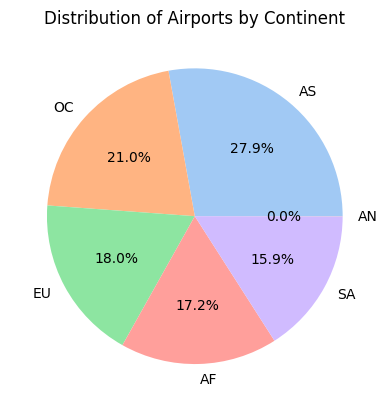

In [215]:
airport_type_counts = airport_df['TYPE'].value_counts()
airport_type_counts.plot(kind='bar', color='lightblue')
plt.title('Count of Airport Types')
plt.xlabel('Airport Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

continent_counts = airport_df['CONTINENT'].value_counts()
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Airports by Continent')
plt.show()


<h1>Merging Data</h1>

In [216]:
# used in case of Memory error

tickets_df = tickets_df.head(100000)
flight_df = flight_df.head(100000)

In [217]:
pd.set_option('display.max_columns', None)

def merge_datasets(flight_df, tickets_df, airport_df):
    merged_df = pd.merge(flight_df, tickets_df, on=['ORIGIN', 'DESTINATION'], how='inner')
    merged_df = pd.merge(merged_df, airport_df, left_on='ORIGIN', right_on='IATA_CODE', how='inner')
    return merged_df

merged_data = merge_datasets(flight_df, tickets_df, airport_df)
print(merged_data.head().to_string(index=False))


   FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN ORIGIN_CITY_NAME  DEST_AIRPORT_ID DESTINATION DEST_CITY_NAME  DEP_DELAY  ARR_DELAY  CANCELLED  AIR_TIME DISTANCE  OCCUPANCY_RATE      ITIN_ID  YEAR  QUARTER ORIGIN_COUNTRY ORIGIN_STATE_ABR ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS  ITIN_FARE          TYPE                              NAME  ELEVATION_FT CONTINENT ISO_COUNTRY MUNICIPALITY IATA_CODE            COORDINATES
2019-03-03         WN   N212WN              1910              10140    ABQ  Albuquerque, NM            10423         AUS     Austin, TX      71.00      52.00       0.00     75.00   619.00            0.43  20191114862  2019        1             US               NM      New Mexico       1.00                AA        1.00     372.00 large_airport Albuquerque International Sunport       5355.00       NaN          US  Albuquerque       ABQ -106.609001, 35.040199
2019-03-03         WN   N212WN              1910              10140    ABQ  

In [218]:
# merged_data.drop('ELEVATION_FT', axis=1, inplace=True)
# merged_data.drop('CONTINENT', axis=1, inplace=True)
# merged_data.drop('MUNICIPALITY', axis=1, inplace=True)

# print(merged_data.isnull().sum())

print(merged_data.columns)
print()
merged_data = merged_data.drop('PASSENGERS', axis=1)
print(merged_data.columns)

Index(['FL_DATE', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST_AIRPORT_ID',
       'DESTINATION', 'DEST_CITY_NAME', 'DEP_DELAY', 'ARR_DELAY', 'CANCELLED',
       'AIR_TIME', 'DISTANCE', 'OCCUPANCY_RATE', 'ITIN_ID', 'YEAR', 'QUARTER',
       'ORIGIN_COUNTRY', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'ROUNDTRIP',
       'REPORTING_CARRIER', 'PASSENGERS', 'ITIN_FARE', 'TYPE', 'NAME',
       'ELEVATION_FT', 'CONTINENT', 'ISO_COUNTRY', 'MUNICIPALITY', 'IATA_CODE',
       'COORDINATES'],
      dtype='object')

Index(['FL_DATE', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST_AIRPORT_ID',
       'DESTINATION', 'DEST_CITY_NAME', 'DEP_DELAY', 'ARR_DELAY', 'CANCELLED',
       'AIR_TIME', 'DISTANCE', 'OCCUPANCY_RATE', 'ITIN_ID', 'YEAR', 'QUARTER',
       'ORIGIN_COUNTRY', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'ROUNDTRIP',
       'REPORTING_CARRIER', 'ITIN_FARE', 'TYPE', 

<h4> Q1 </h4>
<h5> The 10 busiest round trip routes in terms of number of round trip flights in the quarter. Exclude canceled flights when performing the calculation. </h5>

In [219]:
# As we are using quarter 1 data , not setting any edge case
def busiest_round_trip_routes(df):
    filtered_df = df[df['ROUNDTRIP'] == 1]
    filtered_df = filtered_df[filtered_df['ORIGIN_COUNTRY'] == 'US']
    filtered_df = filtered_df[filtered_df['CANCELLED'] == 0]

    grouped_df = filtered_df.groupby(['ORIGIN', 'DESTINATION','ORIGIN_CITY_NAME','DEST_CITY_NAME']).size().reset_index(name='FlightCount')
    sorted_df = grouped_df.sort_values(by='FlightCount', ascending=False)

    top_10_routes = sorted_df.head(10)

    return top_10_routes

top_routes = busiest_round_trip_routes(merged_data)
print(top_routes.to_string(index=False))


ORIGIN DESTINATION ORIGIN_CITY_NAME      DEST_CITY_NAME  FlightCount
   ATL         LGA      Atlanta, GA        New York, NY        97527
   ATL         MCO      Atlanta, GA         Orlando, FL        49700
   ATL         EWR      Atlanta, GA          Newark, NJ        47275
   ATL         LAX      Atlanta, GA     Los Angeles, CA        44520
   ATL         FLL      Atlanta, GA Fort Lauderdale, FL        44030
   ATL         ORD      Atlanta, GA         Chicago, IL        43776
   ATL         DCA      Atlanta, GA      Washington, DC        43065
   ATL         DEN      Atlanta, GA          Denver, CO        41580
   ATL         LAS      Atlanta, GA       Las Vegas, NV        33879
   ATL         PHL      Atlanta, GA    Philadelphia, PA        29212


<h5> Q2 </h5>
<h5> The 10 most profitable round trip routes (without considering the upfront airplane cost) in
the quarter. Along with the profit, show total revenue, total cost, summary values of
other key components and total round trip flights in the quarter for the top 10 most
profitable routes. Exclude canceled flights from these calculations. </h5> 

In [220]:
merged_data = merged_data[merged_data['CANCELLED'] == 0]
merged_data = merged_data[merged_data['ISO_COUNTRY'] == 'US']
merged_data = merged_data[merged_data['ROUNDTRIP'] == 1]
#revenue
merged_data['Passengers'] = merged_data['OCCUPANCY_RATE'] * 200
merged_data['BaggageFees'] = merged_data['Passengers'] * (70 + merged_data['ITIN_FARE'])
#costs
merged_data['TotalMiles'] = merged_data['DISTANCE'] * 2
merged_data['FuelMaintenanceCrewCost'] = merged_data['TotalMiles'] * 8
merged_data['DepreciationInsuranceOtherCost'] = merged_data['TotalMiles'] * 1.18
# airport costs  based on airport type
merged_data['AirportCost'] = merged_data['TYPE'].map({
    'large_airport': 10000,
    'medium_airport': 5000 
})
# delay costs
merged_data['DelayCost'] = (merged_data['DEP_DELAY'] > 15) * (merged_data['DEP_DELAY'] - 15) * 75 + (merged_data['ARR_DELAY'] > 15) * (merged_data['ARR_DELAY'] - 15) * 75

# profit
merged_data['Profit'] = merged_data['BaggageFees'] - ( 
    merged_data['FuelMaintenanceCrewCost'] + 
    merged_data['DepreciationInsuranceOtherCost'] + 
    merged_data['AirportCost'] + 
    merged_data['DelayCost']
    )
# df = merged_data[merged_data['Profit'] > 0]
# print(df.head(10).to_string(index=False))
grouped_data = merged_data.groupby(['ORIGIN', 'DESTINATION','ORIGIN_CITY_NAME','DEST_CITY_NAME','TYPE','COORDINATES']).agg({ 
    'Profit': 'sum',
    'Passengers': 'sum',
    'TotalMiles': 'sum',
    'FL_DATE' : 'count'}).reset_index()
# counts = merged_data['ORIGIN'].value_counts()
# for origin,count in counts.items():
#     print(f'{origin} : {count}')
grouped_data.rename(columns={'FL_DATE': 'Counter'}, inplace=True)
top_10_routes = grouped_data.sort_values(by='Profit', ascending=False).head(10)
print(top_10_routes.to_string(index=False))



ORIGIN DESTINATION ORIGIN_CITY_NAME      DEST_CITY_NAME          TYPE         COORDINATES        Profit  Passengers   TotalMiles  Counter
   ATL         LGA      Atlanta, GA        New York, NY large_airport -84.428101, 33.6367 4341180197.83 13006906.00 148631148.00    97527
   ATL         DCA      Atlanta, GA      Washington, DC large_airport -84.428101, 33.6367 2101587855.20  5405994.00  47113110.00    43065
   ATL         LAX      Atlanta, GA     Los Angeles, CA large_airport -84.428101, 33.6367 1918854465.80  5591500.00 173360880.00    44520
   ATL         MCO      Atlanta, GA         Orlando, FL large_airport -84.428101, 33.6367 1893723327.13  6372800.00  40157600.00    49700
   ATL         EWR      Atlanta, GA          Newark, NJ large_airport -84.428101, 33.6367 1695866054.84  5963970.00  70534300.00    47275
   ATL         ORD      Atlanta, GA         Chicago, IL large_airport -84.428101, 33.6367 1644741475.91  5749704.00  53056512.00    43776
   ATL         LAS      Atlanta, G

<h3> Q3 </h3>
<h4>The 5 round trip routes that you recommend to invest in based on any factors that you
choose.
</h4>

<p><h4>Assuming the following routes based on the profits</h4></p>

<ul>
<li>Route ATL to LGA</li>
<li>Route ATL to MCO</li>
<li>Route ATL to LAX</li>
<li>Route ATL to DCA</li>
<li>Route ATL to EWR</li>
</ul>

<h3> Q4 </h3>
<h4>The number of round trip flights it will take to breakeven on the upfront airplane cost for
each of the 5 round trip routes that you recommend. Print key summary components for
these routes</h4>

In [221]:

# top_10_routes = top_10_routes.sort_values(by='Profit', ascending=False).head(5)
initial_investment = 90000000  # $90 million initial investment
top_10_routes['Breakeven_Flights'] = top_10_routes['Counter']*(initial_investment / top_10_routes['Profit'])
print("Top 5 Round Trip Routes to Invest In:")
print(top_10_routes[['ORIGIN', 'DESTINATION', 'ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'Profit', 'Passengers', 'TotalMiles', 'Breakeven_Flights']] \
    .sort_values(by='Breakeven_Flights',ascending=True) \
    .head(5) \
    .to_string(index=False))


Top 5 Round Trip Routes to Invest In:
ORIGIN DESTINATION ORIGIN_CITY_NAME    DEST_CITY_NAME        Profit  Passengers   TotalMiles Breakeven_Flights
   ATL         SFO      Atlanta, GA San Francisco, CA 1234104062.90  2772000.00  92404800.00           1575.23
   ATL         DCA      Atlanta, GA    Washington, DC 2101587855.20  5405994.00  47113110.00           1844.25
   ATL         LGA      Atlanta, GA      New York, NY 4341180197.83 13006906.00 148631148.00           2021.90
   ATL         LAX      Atlanta, GA   Los Angeles, CA 1918854465.80  5591500.00 173360880.00           2088.12
   ATL         TPA      Atlanta, GA         Tampa, FL 1208416231.00  3926700.00  23202900.00           2128.20


<h3>Q5</h3>

<h4>KEY PERFORMANCE INDICATORS</h4>

From the merged dataset, the following key performance indicators (KPIs) can be derived:

1. **DEP_DELAY**: The average time difference between the scheduled departure time and the actual departure time.
2. **ARR_DELAY**: The average time difference between the scheduled arrival time and the actual arrival time.
3. **CANCELLED**: The percentage of flights that were canceled out of the total number of flights.
4. **AIR_TIME**: The average duration of flights.
5. **DISTANCE**: The average distance covered by flights.
6. **OCCUPANCY_RATE**: The average occupancy rate of flights.

**DERIVED COLUMNS**
1. **Number of Flights**: The total number of flights.
2. **Revenue**: The total revenue generated from ticket sales.
3. **Passengers**: The total number of passengers based on the occupancy rate.
  
These KPIs provide insights into various aspects of airline operations, including profitability, revenue, etc.,